<a href="https://colab.research.google.com/github/aleksey-sut/portfolio/blob/main/keras_digits_CNN_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


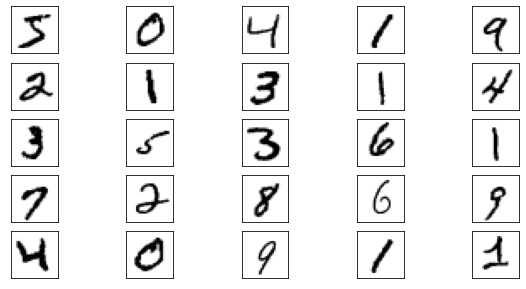

In [3]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [5]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3) #наши входные данные должны иметь размерность: (batch, rows = 28, cols = 28, channels = 1)
x_test = np.expand_dims(x_test, axis=3)

print( x_train.shape )

(60000, 28, 28, 1, 1)


In [6]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])


In [7]:
print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [8]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [9]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 67s 44ms/step - loss: 0.7416 - accuracy: 0.7531 - val_loss: 0.3106 - val_accuracy: 0.9112
Epoch 2/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2613 - accuracy: 0.9211 - val_loss: 0.2003 - val_accuracy: 0.9390
Epoch 3/5
1500/1500 [==============================] - 67s 44ms/step - loss: 0.1794 - accuracy: 0.9454 - val_loss: 0.1564 - val_accuracy: 0.9548
Epoch 4/5
1500/1500 [==============================] - 67s 45ms/step - loss: 0.1353 - accuracy: 0.9587 - val_loss: 0.1201 - val_accuracy: 0.9640
Epoch 5/5
1500/1500 [==============================] - 70s 46ms/step - loss: 0.1119 - accuracy: 0.9660 - val_loss: 0.0999 - val_accuracy: 0.9711


In [10]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 4s 13ms/step - loss: 0.0867 - accuracy: 0.9724


[0.0867382064461708, 0.9724000096321106]

In [11]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 4s 12ms/step


In [12]:
print(pred[:20])
print(y_test[:20])

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [13]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

[ True  True  True  True  True  True  True  True False  True]


In [18]:
x_false = x_test[~mask].reshape(-1,28,28)
y_false = x_test[~mask]
print(x_false.shape)

(276, 28, 28)


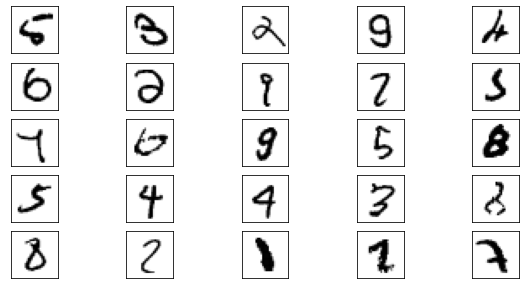

In [19]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()